In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [4]:
pdr2 = Table(fitsio.read('/global/cfs/cdirs/desi/target/analysis/truth/parent/hsc-pdr2-dud-cosmos-reduced.fits', columns=['ra', 'dec', 'g_cmodel_flux']))
pdr3 = Table(fitsio.read('/global/cfs/cdirs/desi/target/analysis/truth/parent/hsc-pdr3-dud-reduced.fits', columns=['ra', 'dec', 'g_cmodel_flux']))
pdr3_rev = Table(fitsio.read('/global/cfs/cdirs/desi/target/analysis/truth/parent/hsc-pdr3-dud-rev-no_mag_limit-reduced.fits', columns=['ra', 'dec', 'g_cmodel_flux']))

In [28]:
mask = (pdr3['ra']>100) & (pdr3['ra']<200)
pdr3 = pdr3[mask]
print(len(pdr3))

mask = (pdr3_rev['ra']>100) & (pdr3_rev['ra']<200)
pdr3_rev = pdr3_rev[mask]
print(len(pdr3_rev))

5495012


In [30]:
print(len(pdr2))
print(len(pdr3))
print(len(pdr3_rev))

1676508
1427602
5495012


In [31]:
pdr2['gmag'] = -2.5 * np.log10(pdr2['g_cmodel_flux']/3630.78) + 22.5
pdr3['gmag'] = -2.5 * np.log10(pdr3['g_cmodel_flux']/3630.78) + 22.5
pdr3_rev['gmag'] = -2.5 * np.log10(pdr3_rev['g_cmodel_flux']/3630.78) + 22.5

/tmp/ipykernel_208931/2774785160.py:3: RuntimeWarning: divide by zero encountered in log10
  pdr3_rev['gmag'] = -2.5 * np.log10(pdr3_rev['g_cmodel_flux']/3630.78) + 22.5
/tmp/ipykernel_208931/2774785160.py:3: RuntimeWarning: invalid value encountered in log10
  pdr3_rev['gmag'] = -2.5 * np.log10(pdr3_rev['g_cmodel_flux']/3630.78) + 22.5


In [32]:
mask = np.isfinite(pdr2['gmag']) & (pdr2['gmag']<25.5)
pdr2 = pdr2[mask]
mask = np.isfinite(pdr3['gmag']) & (pdr3['gmag']<25.5)
pdr3 = pdr3[mask]
mask = np.isfinite(pdr3_rev['gmag']) & (pdr3_rev['gmag']<25.5)
pdr3_rev = pdr3_rev[mask]

print(len(pdr2))
print(len(pdr3))
print(len(pdr3_rev))

1676508
1427602
1427602


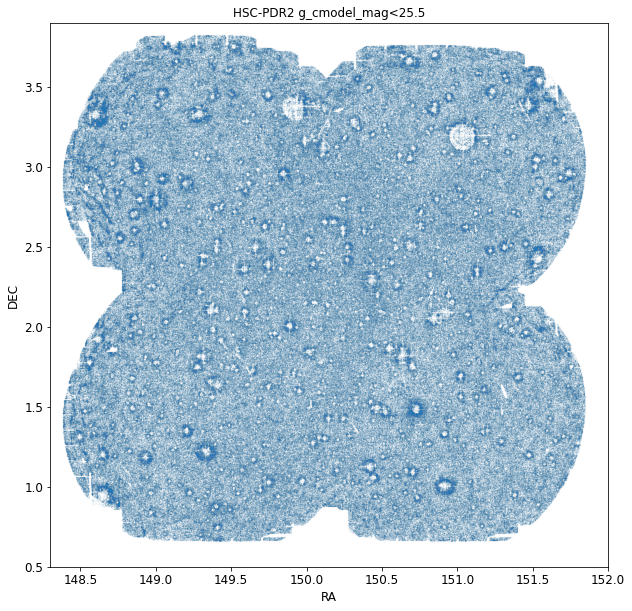

In [53]:
plt.figure(figsize=(10, 10))
plt.plot(pdr2['ra'], pdr2['dec'], '.', ms=0.05)
plt.axis([148.3, 152.0, 0.5, 3.9])
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('HSC-PDR2 g_cmodel_mag<25.5')
plt.show()

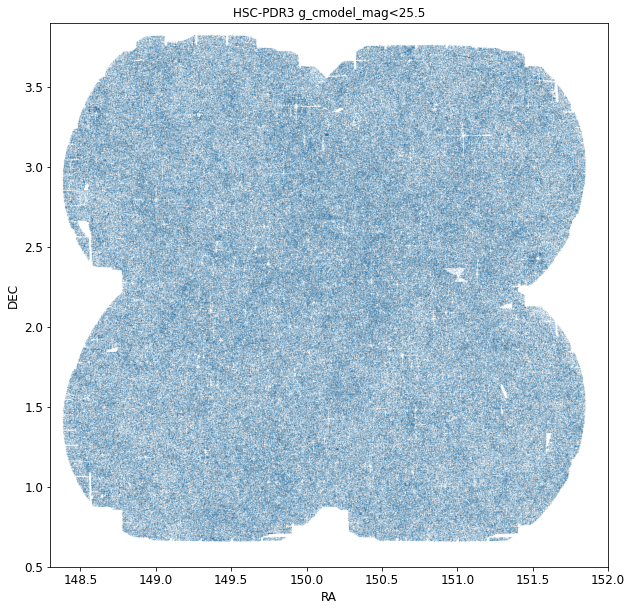

In [54]:
plt.figure(figsize=(10, 10))
plt.plot(pdr3['ra'], pdr3['dec'], '.', ms=0.05)
plt.axis([148.3, 152.0, 0.5, 3.9])
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('HSC-PDR3 g_cmodel_mag<25.5')
plt.show()

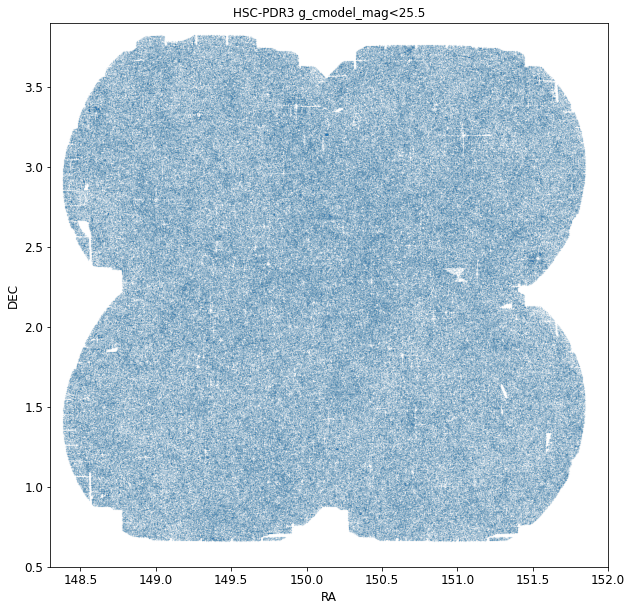

In [55]:
plt.figure(figsize=(10, 10))
plt.plot(pdr3_rev['ra'], pdr3_rev['dec'], '.', ms=0.05)
plt.axis([148.3, 152.0, 0.5, 3.9])
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('HSC-PDR3 g_cmodel_mag<25.5')
plt.show()